# DEFECTIVE SUBPOPULATION ZERO INFLATED

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from reliability.Distributions import Gamma_Distribution, Lognormal_Distribution, DSZI_Model, Weibull_Distribution
from reliability.Fitters import Fit_Weibull_ZI, Fit_Weibull_DS
from reliability.Probability_plotting import plot_points

## Example 1

In [3]:
model = DSZI_Model(
    distribution = Gamma_Distribution(alpha = 50, beta = 2),
    DS = 0.9,
    ZI = 0.3
)

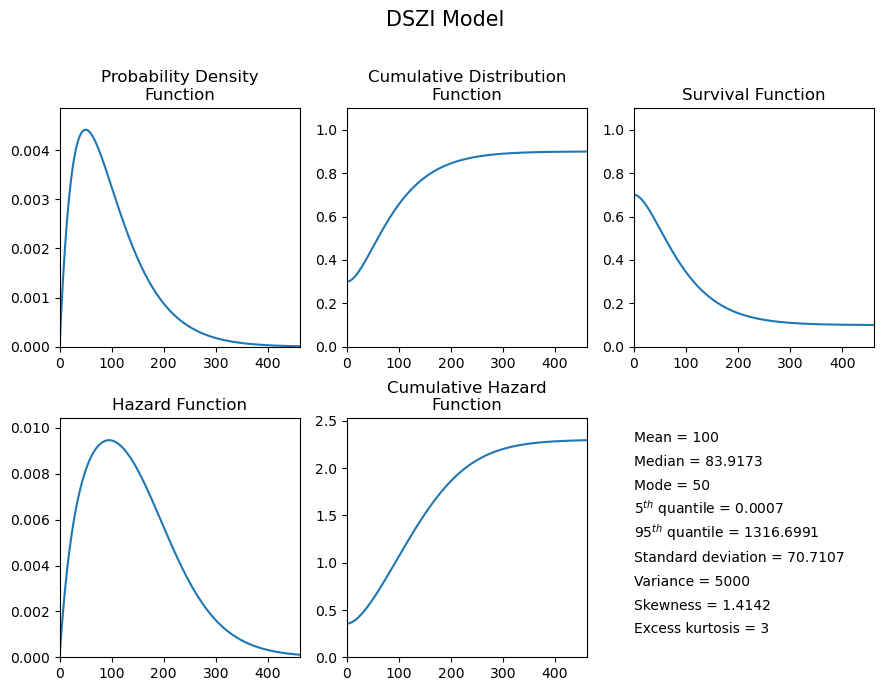

In [4]:
model.plot()

## Example 2

In [7]:
model = DSZI_Model(
    distribution = Lognormal_Distribution(mu=2,sigma=0.5),
    DS = 0.75
)

In [8]:
failures, right_censored = model.random_samples(50, seed = 7, right_censored_time = 50)

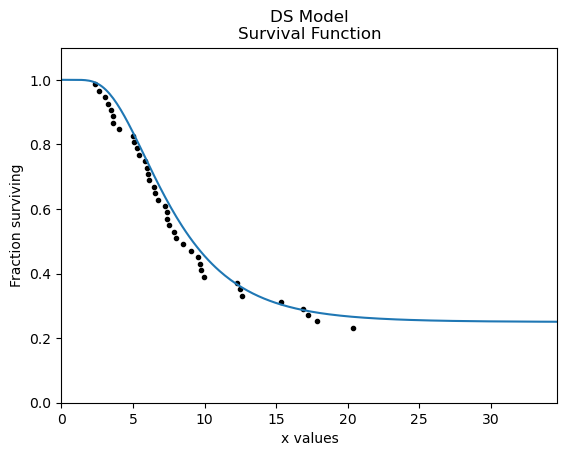

In [10]:
model.SF()
plot_points(failures = failures, right_censored = right_censored, func="SF")
plt.show()

## Example 3

In [12]:
data = Weibull_Distribution(alpha = 200, beta = 5).random_samples(70, seed = 1)

In [13]:
zeros = np.zeros(30)

In [14]:
failures = np.hstack([zeros, data])

Results from Fit_Weibull_ZI (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 100/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         192.931         5.33803   182.747   203.682
     Beta         4.53177        0.431272   3.76064   5.46102
       ZI             0.3       0.0458258  0.218403  0.396613 

Goodness of fit    Value
 Log-likelihood -426.504
           AICc  859.259
            BIC  866.824
             AD  5.88831 



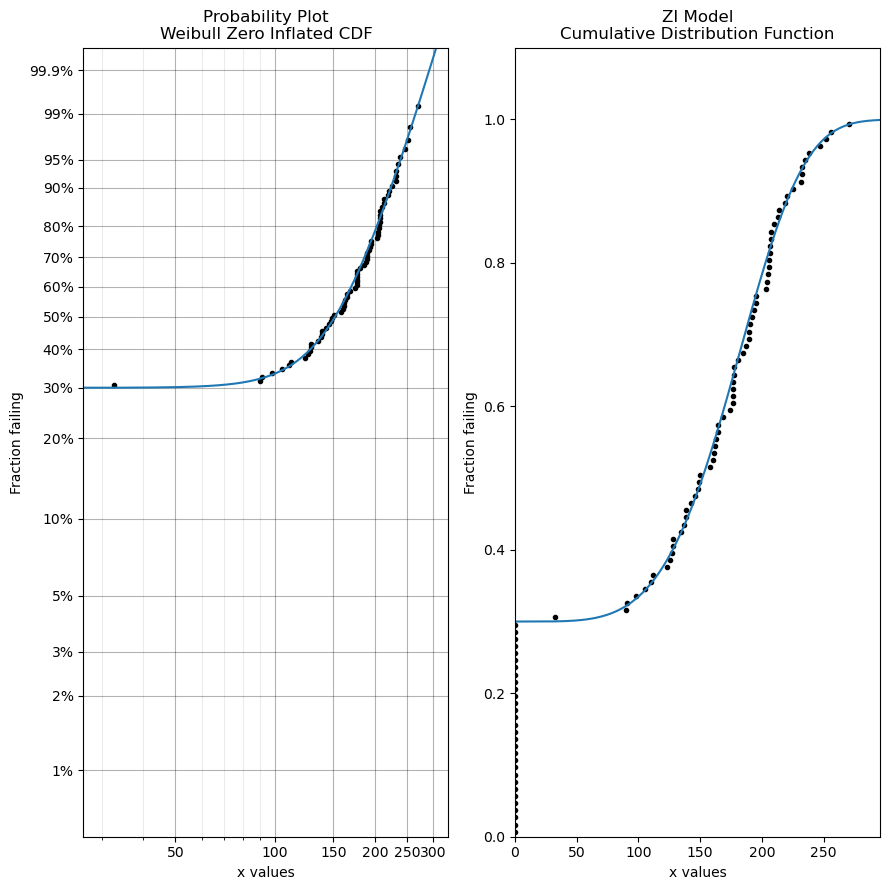

In [15]:
plt.subplot(121)
fit = Fit_Weibull_ZI(failures = failures)
plt.subplot(122)
fit.distribution.CDF()
plot_points(failures=failures)
plt.tight_layout()
plt.show()

## Example 4

In [17]:
model = DSZI_Model(
    distribution = Weibull_Distribution(alpha = 70, beta = 2.5), 
    DS = 0.4
)

In [18]:
failures, right_censored = model.random_samples(100, right_censored_time = 120, seed = 3)

Results from Fit_Weibull_DS (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 41/59 (59% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         67.9275         4.61424   59.4599   77.6009
     Beta         2.63207        0.357826    2.0164   3.43571
       DS        0.414739       0.0500682  0.321106  0.514964 

Goodness of fit    Value
 Log-likelihood -254.236
           AICc  514.721
            BIC  522.287
             AD  374.746 



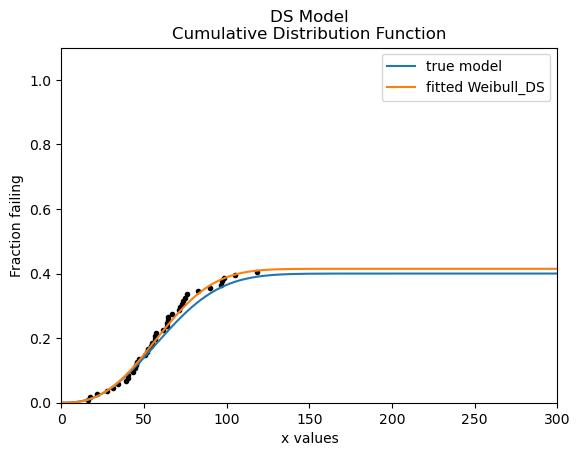

In [21]:
model.CDF(label="true model", xmax=300)
fit_DS = Fit_Weibull_DS(failures=failures, right_censored=right_censored, show_probability_plot=False)
fit_DS.distribution.CDF(label="fitted Weibull_DS", xmax=300)
plot_points(failures=failures, right_censored=right_censored)
plt.legend()
plt.show()